In [6]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
import pandas as pd
df = pd.read_csv("Car_price_cleaned.csv")
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df = df.copy()
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight_squared,enginesize_squared,boreratio_squared,stroke_squared,compressionratio_squared,horsepower_squared,peakrpm_squared,citympg_squared,highwaympg_squared,log_enginesize
0,1,3,1,0,1,0,2,0,-1.690772,-0.426521,...,6492304,16900,12.0409,7.1824,81.0,12321,25000000,441,729,4.875197
1,2,3,1,0,1,0,2,0,-1.690772,-0.426521,...,6492304,16900,12.0409,7.1824,81.0,12321,25000000,441,729,4.875197
2,3,1,1,0,1,2,2,0,-0.708596,-0.231513,...,7969329,23104,7.1824,12.0409,81.0,23716,25000000,361,676,5.030438
3,4,2,1,0,0,3,1,0,0.173698,0.207256,...,5461569,11881,10.1761,11.5600,100.0,10404,30250000,576,900,4.700480
4,5,2,1,0,0,3,0,0,0.107110,0.207256,...,7974976,18496,10.1761,11.5600,64.0,13225,30250000,324,484,4.919981


In [10]:
df.isnull().values.any()

False

In [12]:
df.corr()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight_squared,enginesize_squared,boreratio_squared,stroke_squared,compressionratio_squared,horsepower_squared,peakrpm_squared,citympg_squared,highwaympg_squared,log_enginesize
car_ID,1.000000,-0.151621,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,0.170636,...,0.036202,-0.078822,0.260587,-0.162609,0.148533,-0.019594,-0.204893,-0.023611,-0.017436,0.021369
symboling,-0.151621,1.000000,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,...,-0.236671,-0.089206,-0.128438,-0.003567,-0.179647,0.077912,0.266609,-0.012111,0.041842,-0.128053
fueltype,-0.125568,0.194311,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,...,-0.221943,-0.036090,-0.055511,-0.243359,-0.991709,0.142254,0.453793,-0.254841,-0.207156,-0.096957
aspiration,0.067729,-0.059866,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,...,0.310994,0.050565,0.215725,0.231845,0.334178,0.177224,-0.176900,-0.200254,-0.249370,0.158960
doornumber,-0.190352,0.664073,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,...,-0.187431,0.009120,-0.112732,0.010969,-0.181913,0.153551,0.247700,0.041177,0.047352,-0.058756
carbody,0.098303,-0.596135,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,...,0.126234,-0.080259,0.006043,-0.013577,0.138596,-0.161815,-0.111122,0.013135,-0.014230,-0.052851
drivewheel,0.051406,-0.041671,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,...,0.572193,0.475479,0.486464,0.071915,0.118280,0.467854,-0.024714,-0.411884,-0.424078,0.531860
enginelocation,0.051483,0.212471,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,...,0.037392,0.169477,0.191152,-0.140776,-0.028422,0.347196,0.206637,-0.130971,-0.098950,0.201986
wheelbase,0.129729,-0.531954,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,...,0.779766,0.521781,0.488411,0.178913,0.261761,0.272997,-0.351729,-0.453105,-0.512591,0.593749
carlength,0.170636,-0.357612,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,...,0.856286,0.607030,0.602958,0.150709,0.172177,0.457182,-0.285182,-0.650193,-0.676871,0.731592


In [14]:
import statsmodels.formula.api as smf
lm = smf.ols("enginesize_squared ~ price", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     enginesize_squared   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     527.2
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           2.46e-58
Time:                        21:09:54   Log-Likelihood:                -2120.3
No. Observations:                 205   AIC:                             4245.
Df Residuals:                     203   BIC:                             4251.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2328.2023   1024.049     -2.274      0.024   -4347.339    -309.066
price          1.5184      0.066     22.960      0.000       1.388       1.649
==============================================================================
Omnibus:                      137.841   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1963.475
Skew:                           2.304   Prob(JB):                         0.00
Kurtosis:                      17.444   Cond. No.                     3.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model.params

Intercept   -2328.202317
price           1.518398
dtype: float64

In [18]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2328.2023,1024.049,-2.274,0.024,-4347.339,-309.066
price,1.5184,0.066,22.960,0.000,1.388,1.649


In [20]:
model.rsquared_adj

0.7206105041361652

In [22]:
from sklearn.linear_model import LinearRegression

In [24]:
X = df[["price"]]
y = df["enginesize_squared"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_
model.coef_

array([1.51839751])

In [26]:
model.score(X,y)

0.721980060488439

In [28]:
model.predict(X)[0:10]

array([18162.57207703, 22725.35659389, 22725.35659389, 18853.44294397,
       24167.83422817, 20827.35970667, 24562.61758071, 26399.87856753,
       33923.53822844, 24789.11238205])

In [30]:
yeni_veri = [[10],[100],[500],[1000]]

In [32]:
model.predict(yeni_veri)

array([-2313.01834221, -2176.36256633, -1569.00356242,  -809.80480754])

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
lm = smf.ols("enginesize_squared ~ price ", df)
model = lm.fit()

In [38]:
mse = mean_squared_error(y, model.fittedvalues)

In [40]:
mse

56385417.47483729

In [42]:
import numpy as np
rmse = np.sqrt(mse)

In [44]:
rmse

7509.02240473667

In [46]:
reg.predict(X)[0:10]

array([18162.57207703, 22725.35659389, 22725.35659389, 18853.44294397,
       24167.83422817, 20827.35970667, 24562.61758071, 26399.87856753,
       33923.53822844, 24789.11238205])

In [48]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})

In [50]:
k_t

,gercek_y,tahmin_y
0,16900,18162.572077
1,16900,22725.356594
2,23104,22725.356594
3,11881,18853.442944
4,18496,24167.834228
5,18496,20827.359707
6,18496,24562.617581
7,18496,26399.878568
8,17161,33923.538228
9,17161,24789.112382


In [52]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [54]:
k_t

,gercek_y,tahmin_y,hata
0,16900,18162.572077,-1262.572077
1,16900,22725.356594,-5825.356594
2,23104,22725.356594,378.643406
3,11881,18853.442944,-6972.442944
4,18496,24167.834228,-5671.834228
5,18496,20827.359707,-2331.359707
6,18496,24562.617581,-6066.617581
7,18496,26399.878568,-7903.878568
8,17161,33923.538228,-16762.538228
9,17161,24789.112382,-7628.112382


In [56]:
k = k_t["hata_kare"] = k_t["hata"]**2

In [58]:
k

0    1.594088e+06
1    3.393478e+07
2    1.433708e+05
3    4.861496e+07
4    3.216970e+07
5    5.435238e+06
6    3.680385e+07
7    6.247130e+07
8    2.809827e+08
9    5.818810e+07
Name: hata, dtype: float64

In [60]:
np.sqrt(np.mean(k_t["hata_kare"]))

7485.573273831511

In [62]:
model.resid[0:10]

0    -1262.572077
1    -5825.356594
2      378.643406
3    -6972.442944
4    -5671.834228
5    -2331.359707
6    -6066.617581
7    -7903.878568
8   -16762.538228
9    -7628.112382
dtype: float64

In [64]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2328.2023,1024.049,-2.274,0.024,-4347.339,-309.066
price,1.5184,0.066,22.960,0.000,1.388,1.649


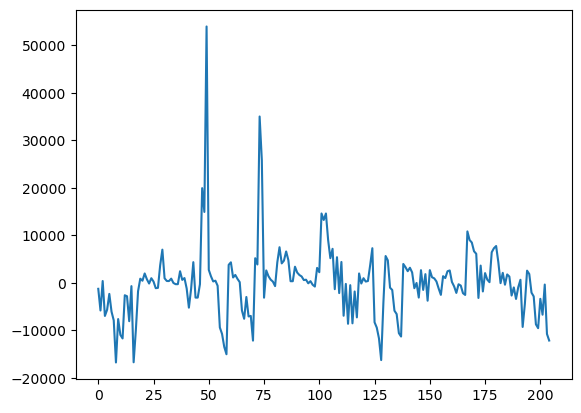

In [66]:
plt.plot(model.resid);

In [68]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [70]:
import pandas as pd
X = df.drop("price", axis = 1)
y = df["enginesize_squared"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [72]:
X_train.shape

(164, 41)

In [74]:
X_test.shape

(41, 41)

In [76]:
y_train.shape

(164,)

In [78]:
y_test.shape

(41,)

In [80]:
training = df.copy()

In [82]:
training.shape

(205, 42)

# PCR MODEL

In [151]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [153]:
df = pd.read_csv("Car_price_cleaned.csv")
df= df.select_dtypes(include = ['float64', 'int64'])
X = df.drop("price", axis = 1)
y = df["enginesize_squared"]


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (153, 41)
y_train (153,)
X_test (52, 41)
y_test (52,)
training (205, 42)


In [157]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [159]:
X_reduced_train[0:1,:]

array([[-6.13766972e+00, -4.76430504e+00,  5.31869952e+00,
         1.82088637e-01, -4.80842891e-01,  1.27078389e+00,
         2.86345700e-02,  1.74875718e+00,  5.79033923e-01,
        -1.03887789e-01, -5.56698880e-01,  5.28535835e-01,
         5.33157029e-02, -1.08486478e-02,  1.03511358e-01,
         2.29142916e+00,  1.50812592e-01, -6.22962523e-01,
        -3.79779883e-01, -6.15591448e-01, -2.70113128e-01,
         6.83897602e-01,  2.96319538e-01, -3.26375377e-02,
         3.15346360e-01, -9.08255216e-02, -1.18954966e-01,
         4.83407748e-01, -2.68847836e-02,  9.32016243e-03,
         3.75118771e-02,  8.01782693e-02,  5.94168525e-02,
         1.71143019e-02, -1.06771657e-02, -3.79533184e-02,
         1.08927725e-02,  7.39667214e-04,  1.39960214e-02,
        -1.14571442e-02,  6.93877981e-03]])

In [161]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([35.15, 52.81, 60.57, 67.21, 72.03])

In [163]:
lm = LinearRegression()

pcr_model = lm.fit(X_reduced_train, y_train)

In [165]:
pcr_model.intercept_

17783.69934640523

In [167]:
pcr_model.coef_     #PCR MODEL OLMADI.

array([ 2912.7615157 ,  1058.88109548,  2399.0705306 ,  1403.86496323,
        2883.17003684,   104.68083339,  1185.63110043,  2837.06854961,
         287.17460444,  1108.1368315 , -1042.15790686,   693.47911759,
        1003.6553851 ,   250.75704222,  2475.23714055,  -906.48998638,
        1572.91354763, -3662.99675968,  1184.26703377, -2971.2344607 ,
        -719.00423714, -3299.690206  , -4669.62691763,  7023.4537464 ,
        -413.253434  ,  1399.91315505, -2914.85382053, -1150.54096667,
         -12.1642105 ,  -815.81412879, -1600.86058498, -1469.31750188,
        1546.95905623,  1320.94119492,   480.89533725,  -416.90642583,
        -753.61506085,  1593.3403336 ,  4596.06514918,  -307.23105819,
         780.81437017])

In [169]:
y_pred = pcr_model.predict(X_reduced_train)

In [171]:
y_pred[0:5]

array([10609., 14884.,  9409., 18496., 21316.])

In [173]:
np.sqrt(mean_squared_error(y_train, y_pred))

2.6058491890092467e-11

In [175]:
df["enginesize_squared"].mean()

17831.121951219513

In [177]:
r2_score(y_train, y_pred)

1.0

In [179]:
pca2 = PCA()

In [181]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [183]:
y_pred = pcr_model.predict(X_reduced_test)

In [185]:
np.sqrt(mean_squared_error(y_test, y_pred))

12365.296060652672

In [187]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

11766.533060638121


In [189]:
from sklearn import model_selection

In [191]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [193]:
lm = LinearRegression()

In [195]:
RMSE = []

In [197]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

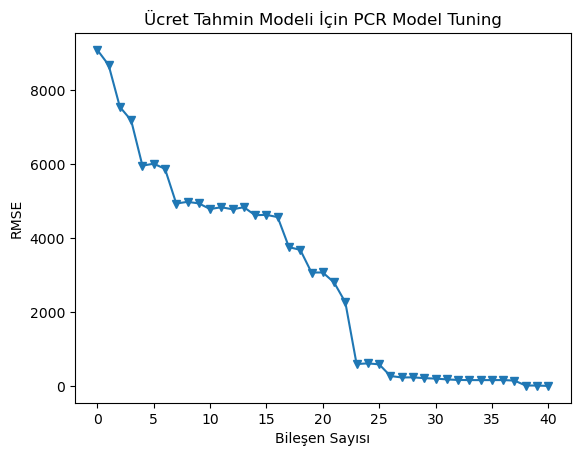

In [198]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Ücret Tahmin Modeli İçin PCR Model Tuning');

In [200]:
lm = LinearRegression()

In [203]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [205]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [207]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

5565.604347624075


In [209]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [211]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

10513.801801918788


# PLS MODEL

In [215]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [217]:
pls_model = PLSRegression().fit(X_train, y_train)

In [219]:
pls_model.coef_

array([[-531.76026401,   83.39990066,   53.73508742, -807.26224006,
         602.55242733, -665.70821297,  349.33070528,  488.40347939,
          30.07444156,  145.73297952,  573.68932015, -793.23640733,
         860.55507075,  521.02260414,   47.23062111, 2164.074111  ,
        -109.34125749,  137.39497152,  225.90570701,   71.7134058 ,
        1102.93927716, -485.79188871, -214.28718123, -314.08379603,
        -679.27270631, 1283.15527028,  672.54412838,   54.20161767,
         181.8135786 ,  596.56641167, -788.05574402, 1083.50071458,
        2526.05852915,  153.53451172,  272.64969975,   32.688001  ,
        1364.19125475, -489.32855078,   -4.76715865,  -86.27208626,
        1733.34652561]])

In [221]:
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (153, 41)
y_train (153,)
X_test (52, 41)
y_test (52,)
training (205, 42)


In [223]:
X_reduced_train[0:1,:]

array([[-6.13766972e+00, -4.76430504e+00,  5.31869952e+00,
         1.82088637e-01, -4.80842891e-01,  1.27078389e+00,
         2.86345700e-02,  1.74875718e+00,  5.79033923e-01,
        -1.03887789e-01, -5.56698880e-01,  5.28535835e-01,
         5.33157029e-02, -1.08486478e-02,  1.03511358e-01,
         2.29142916e+00,  1.50812592e-01, -6.22962523e-01,
        -3.79779883e-01, -6.15591448e-01, -2.70113128e-01,
         6.83897602e-01,  2.96319538e-01, -3.26375377e-02,
         3.15346360e-01, -9.08255216e-02, -1.18954966e-01,
         4.83407748e-01, -2.68847836e-02,  9.32016243e-03,
         3.75118771e-02,  8.01782693e-02,  5.94168525e-02,
         1.71143019e-02, -1.06771657e-02, -3.79533184e-02,
         1.08927725e-02,  7.39667214e-04,  1.39960214e-02,
        -1.14571442e-02,  6.93877981e-03]])

In [225]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

11766.533060638121


In [227]:
X_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight_squared,enginesize_squared,boreratio_squared,stroke_squared,compressionratio_squared,horsepower_squared,peakrpm_squared,citympg_squared,highwaympg_squared,log_enginesize
90,91,1,0,0,1,3,1,0,-0.708596,-0.710909,...,4068289,10609,8.9401,12.0409,479.61,3025,23040000,2025,2500,4.644391
173,174,-1,1,0,0,3,1,0,0.606521,0.126002,...,5410276,14884,10.9561,12.5316,75.69,8464,17640000,841,1156,4.812184
93,94,1,1,0,0,4,1,0,-0.708596,-0.312767,...,4096576,9409,9.9225,10.8241,88.36,4761,27040000,961,1369,4.584967
5,6,2,1,0,1,3,1,0,0.173698,0.264133,...,6285049,18496,10.1761,11.5600,72.25,12100,30250000,361,625,4.919981
167,168,2,1,0,1,1,2,0,-0.059361,0.174754,...,6451600,21316,13.1044,12.2500,86.49,13456,23040000,576,900,4.990433


In [229]:
pls_model.predict(X_train)[0:10]

array([ 6904.69092658, 13928.18553198,  7563.23381057, 22241.3666829 ,
       24608.88397426, 14077.53641196, 42549.90699189,  8826.35030232,
       11564.16939994, 40097.14952963])

In [231]:
y_pred = pls_model.predict(X_train)

In [233]:
np.sqrt(mean_squared_error(y_train, y_pred))

4773.937077636045

In [235]:
r2_score(y_train, y_pred) #gayet yüksek bir doğruluk değeri elde ettik.

0.8868865935268343

In [237]:
y_pred = pls_model.predict(X_test)

In [239]:
np.sqrt(mean_squared_error(y_test, y_pred)) #hata oranı

5550.960698024748

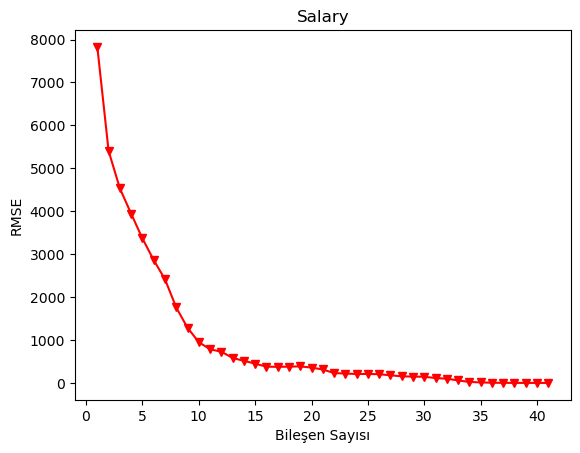

In [241]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [242]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [243]:
y_pred = pls_model.predict(X_test)

In [245]:
np.sqrt(mean_squared_error(y_test, y_pred))  #hata değerlerini bu kadar yükskek olmasını nedeni metre küp hesabıdan dolayı.

5550.960698024748

In [251]:
len(df)

205

# ELASTIC NET

In [306]:
df = pd.read_csv("Car_price_cleaned.csv")
df= df.select_dtypes(include = ['float64', 'int64'])
X = df.drop("price", axis = 1)
y = df["enginesize_squared"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [308]:
from sklearn.linear_model import ElasticNet

In [310]:
enet_model = ElasticNet().fit(X_train, y_train)

In [312]:
enet_model.coef_

array([ 9.19958218e-05, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  1.52787176e-04,
       -6.12587786e-05, -1.77428580e-04,  2.52801854e-05,  2.25801845e-08,
        1.00000578e+00,  0.00000000e+00, -0.00000000e+00,  6.87569806e-04,
       -8.26579528e-06,  3.23367611e-09, -2.09479428e-03,  1.39712777e-03,
       -0.00000000e+00])

In [314]:
enet_model.intercept_

0.7815384347450163

In [316]:
enet_model.predict(X_test)

array([43681.00835204, 17160.96966274, 14400.06404222, 14640.92061224,
       33489.23883215,  9408.98015235, 12100.47185239,  9604.05768134,
       11664.00783245,  9409.43036215, 18495.99559142,  9603.86919534,
       19600.43480604, 14883.95999807, 94864.20646928,  8464.25285557,
        3720.67979468, 24335.95164117, 14884.09871361, 11664.01254581,
       14883.93404829, 32761.02936751,  9409.06028395,  8463.25979495,
        8100.21298726, 43680.88882429, 21316.02141683, 19880.91932399,
        9408.88707722, 19880.8991154 , 33489.19378256,  8100.21976166,
        8463.97088949, 29929.1116739 ,  9604.199399  , 33489.15584833,
       11663.92740968,  4900.10379152,  8099.81666009, 24335.96391881,
       11663.74953127, 17956.61983739, 14400.08656429,  8463.96578239,
        9408.98444876, 12100.09275611,  8100.21093006, 11664.12979221,
       23104.22244325, 24335.94396165,  8099.81127847, 29240.87671126])

In [320]:
np.sqrt(mean_squared_error(y_test, y_pred))

5550.960698024748

In [322]:
r2_score(y_test, y_pred)

0.8509207902576

In [334]:
from sklearn.linear_model import ElasticNetCV

In [336]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [338]:
enet_cv_model.alpha_

64825487.34601598

In [340]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [345]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [347]:
y_pred = enet_tuned.predict(X_test)

In [349]:
np.sqrt(mean_squared_error(y_test, y_pred))

4888.363729797738